# **Tittle: Multi-Vehicle Image Classification CNN Model**

#### **Import Zip File OF Dateset From Kaggle**

In [ ]:
!kaggle datasets download -d "Kaggle API"

Dataset URL: https://www.kaggle.com/datasets/praveenchoudhary1217/multi-vehicle-image-car-plane-bike
License(s): apache-2.0
 89% 167M/187M [00:01<00:00, 159MB/s]
100% 187M/187M [00:01<00:00, 166MB/s]


In [ ]:
# pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 437.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.4/447.4 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 70.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.utils import class_weight, compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import Image, display
from google.colab import files  # For file upload in Colab or Jupyter
import gradio as gr
from tensorflow.keras.preprocessing import image
import zipfile


#### **Export The Zip File**

In [ ]:
zip_ref = zipfile.ZipFile('/content/multi-vehicle-image-car-plane-bike.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

#### **Loading and Preprocessing Data**

In [ ]:
img_size = (128, 128)  # Resize images to 128x128
batch_size = 32
data_dir = '/content/Images'

# ImageDataGenerator for augmenting and normalizing the images
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load training data
train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Load validation data
val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Extract class indices
class_labels = list(train_gen.class_indices.keys())
print("Classes: ", class_labels)


Found 3281 images belonging to 3 classes.
Found 819 images belonging to 3 classes.
Classes:  ['Bike Images', 'Car Images', 'Plane Image']


#### **Visualization Datasets**

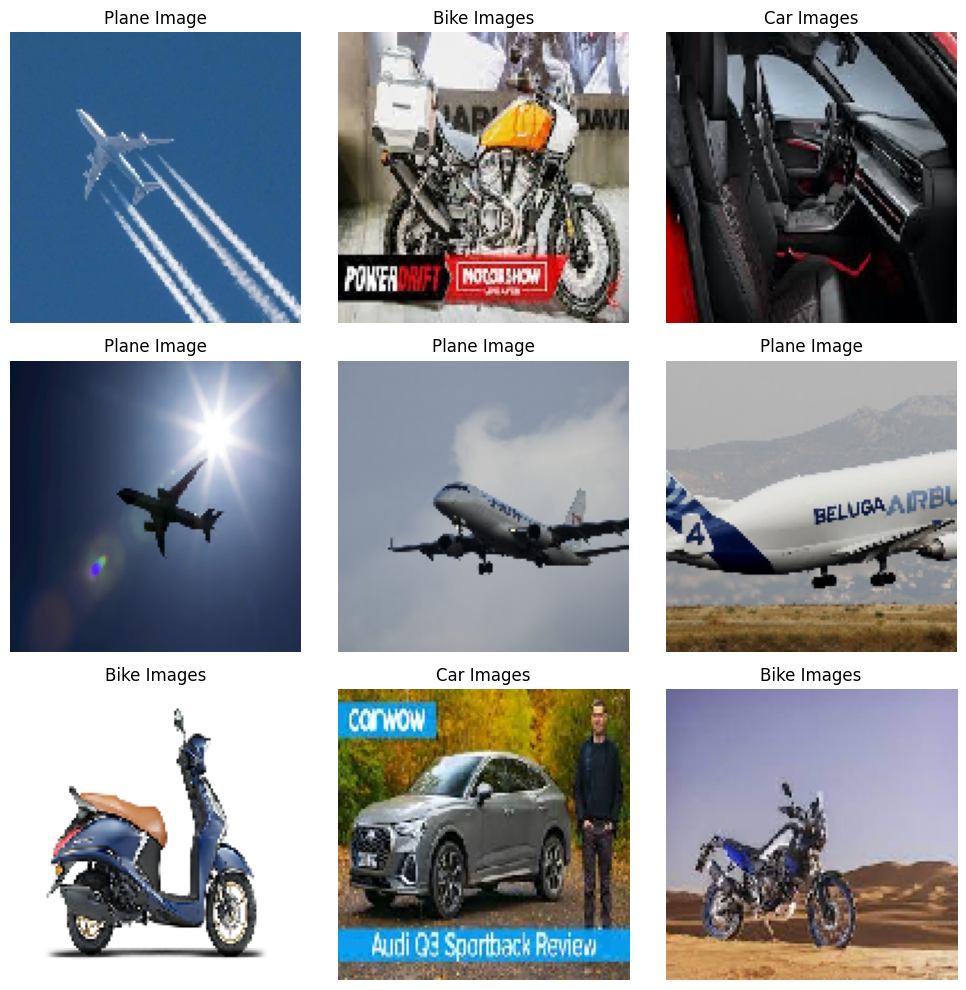

In [ ]:
# Plot 9 images (3 per class)
images, labels = next(train_gen)

class_names = list(train_gen.class_indices.keys())

plt.figure(figsize=(10, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(class_names[np.argmax(labels[i])])
    plt.axis('off')

plt.tight_layout()
plt.show()

# **Building the CNN Model**

In [ ]:
#CNN model
model = Sequential()

# convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten Layer
model.add(Flatten())

# Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # For Reduceing overfitting (In Training Part)
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(len(class_labels), activation='softmax'))

# Compile model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,315,075 (12.65 MB)

 Trainable params: 3,315,075 (12.65 MB)

 Non-trainable params: 0 (0.00 B)

## **Model Visualize**

In [ ]:
from tensorflow.keras.utils import plot_model

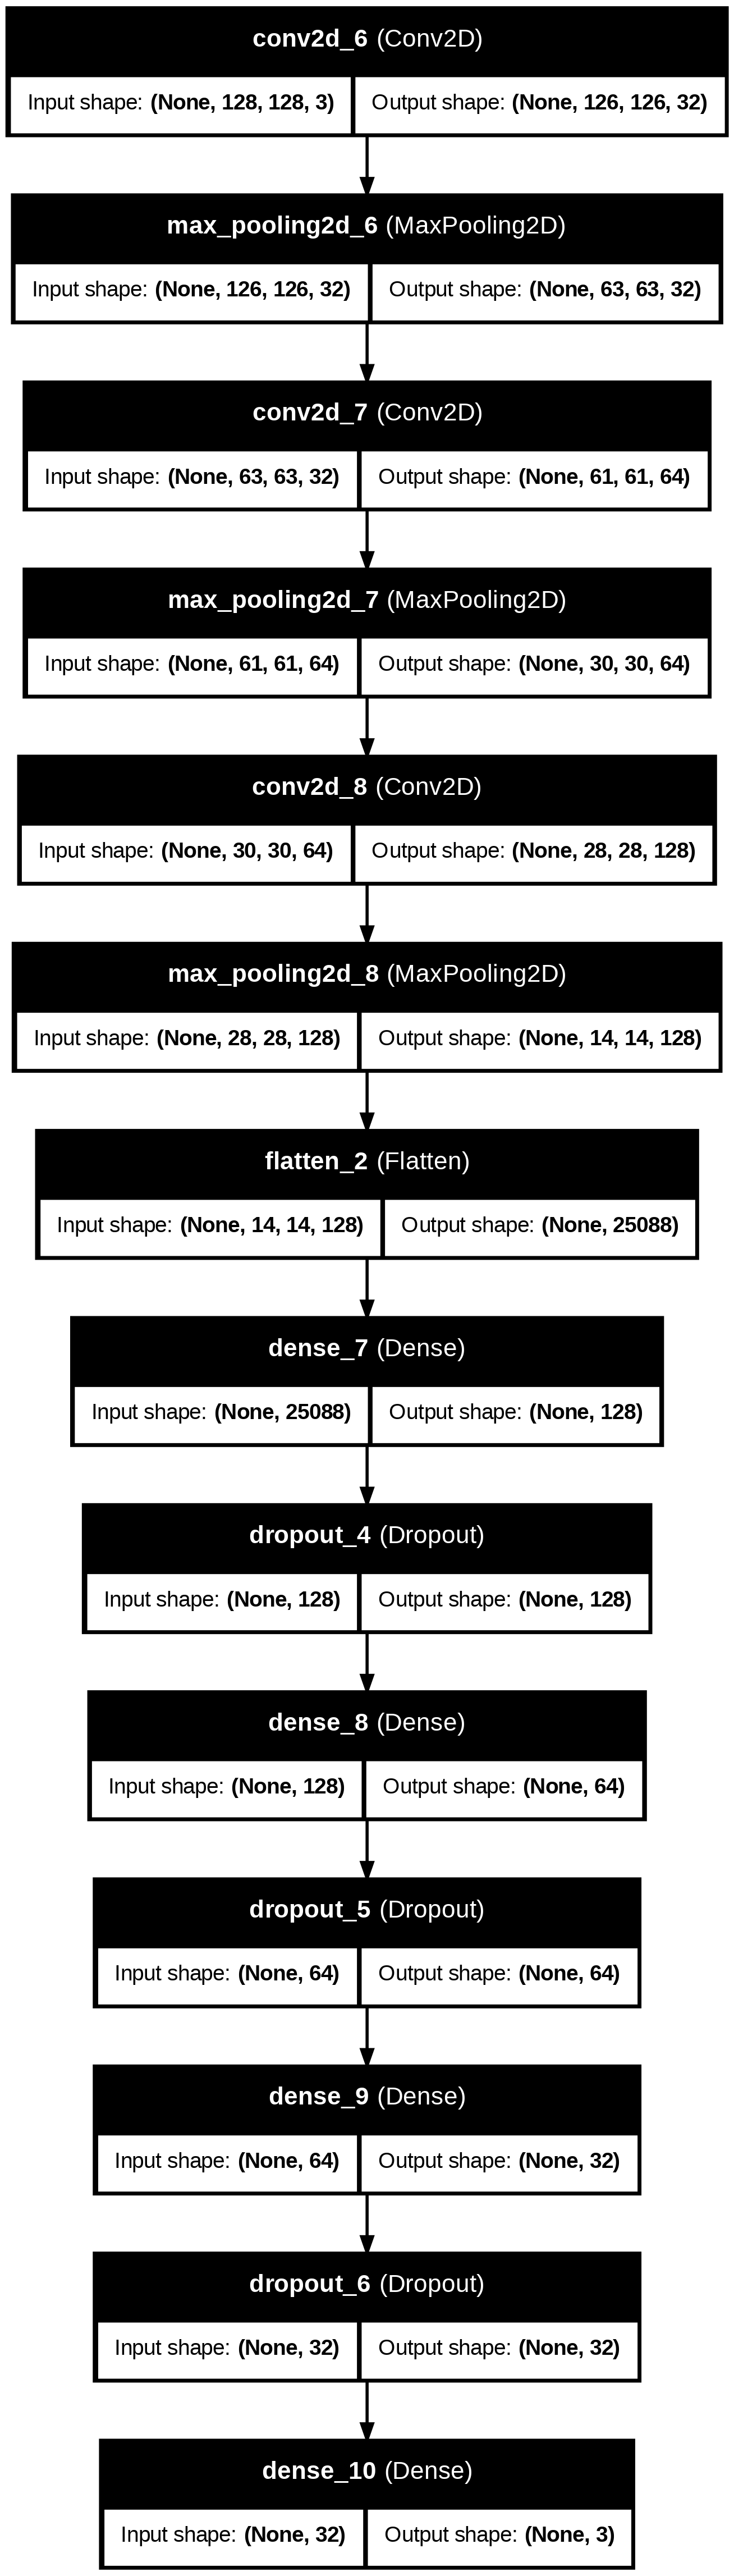

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# **Callbacks: Early Stopping and Class Weights**

In [ ]:
# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Calculate class weights
y_train = train_gen.classes
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weights_dict = dict(enumerate(class_weights))
print("Class weights: ", class_weights_dict)


Class weights:  {0: 0.9996953077391835, 1: 1.0006099420555048, 2: 0.9996953077391835}


## **Training the Model**

In [ ]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=100,
    callbacks=[early_stopping],
    class_weight=class_weights_dict
)

Epoch 1/100
 63/103 ━━━━━━━━━━━━━━━━━━━━ 26s 659ms/step - accuracy: 0.3545 - loss: 1.1407

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


103/103 ━━━━━━━━━━━━━━━━━━━━ 77s 724ms/step - accuracy: 0.3749 - loss: 1.1144 - val_accuracy: 0.7534 - val_loss: 0.7266
Epoch 2/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 74s 716ms/step - accuracy: 0.7411 - loss: 0.6566 - val_accuracy: 0.9084 - val_loss: 0.2907
Epoch 3/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 82s 714ms/step - accuracy: 0.8903 - loss: 0.3128 - val_accuracy: 0.9035 - val_loss: 0.2744
Epoch 4/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 82s 717ms/step - accuracy: 0.9095 - loss: 0.2785 - val_accuracy: 0.9060 - val_loss: 0.2490
Epoch 5/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 75s 721ms/step - accuracy: 0.9336 - loss: 0.2034 - val_accuracy: 0.8901 - val_loss: 0.3729
Epoch 6/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 75s 720ms/step - accuracy: 0.9409 - loss: 0.1974 - val_accuracy: 0.9328 - val_loss: 0.2537
Epoch 7/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 82s 717ms/step - accuracy: 0.9563 - loss: 0.1398 - val_accuracy: 0.9206 - val_loss: 0.2315
Epoch 8/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 74s 714ms/step - accuracy: 0.9579 - loss: 0.132

## **Evaluating Model Performance on Test Set**

In [ ]:
# Evaluate model on test data
test_gen = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,  # Disable shuffling in test set (Never it will create problem in classification Reppot and cm matric)
    subset='validation'
)

# Model evaluation
test_loss, test_acc = model.evaluate(test_gen)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

Found 819 images belonging to 3 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 247ms/step - accuracy: 0.9482 - loss: 0.1472
Test Accuracy: 93.77%


## **Confusion Matrix and Classification Report**

26/26 ━━━━━━━━━━━━━━━━━━━━ 11s 409ms/step


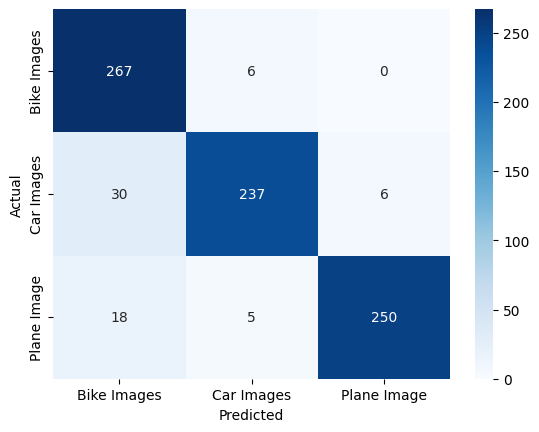

In [36]:
# Predict labels for test data
y_pred = model.predict(test_gen)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = test_gen.classes

# Confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [37]:
# Classification report
report = classification_report(y_true_labels, y_pred_labels, target_names=class_labels)
print(report)

              precision    recall  f1-score   support

 Bike Images       0.85      0.98      0.91       273
  Car Images       0.96      0.87      0.91       273
 Plane Image       0.98      0.92      0.95       273

    accuracy                           0.92       819
   macro avg       0.93      0.92      0.92       819
weighted avg       0.93      0.92      0.92       819



In [38]:
# Save the model
model.save('vehicle_classifier_model.h5')

## **Plot Training and Validation Curves**

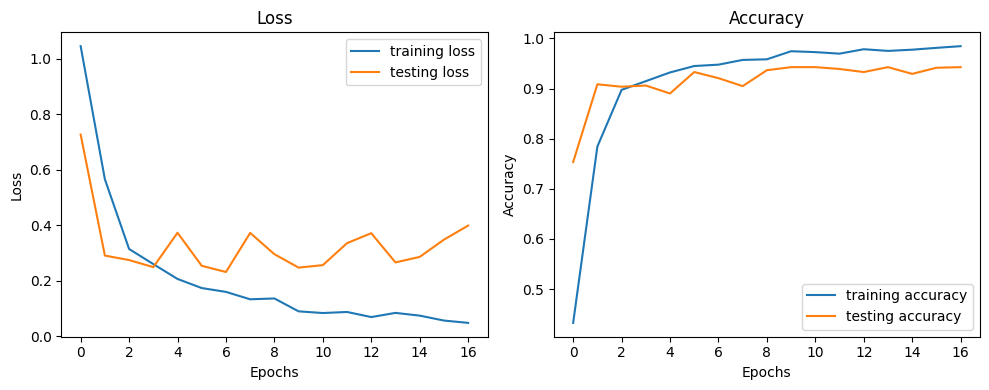

In [39]:
# ploting line graph For training and testing loss, accuracy curve
fig, axes = plt.subplots(1,2 , figsize =(10, 4))

sns.lineplot(ax = axes[0], data = history.history['loss'], label = 'training loss' )
sns.lineplot(ax= axes[0], data = history.history['val_loss'], label = 'testing loss')
axes[0].set_title('Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()

sns.lineplot(ax = axes[1], data = history.history['accuracy'], label = 'training accuracy')
sns.lineplot(ax = axes[1], data = history.history['val_accuracy'], label = 'testing accuracy')
axes[1].set_title('Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

plt.tight_layout()
plt.show()

## **Predict on a Single Image**

Saving car image.png to car image (1).png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Car Images


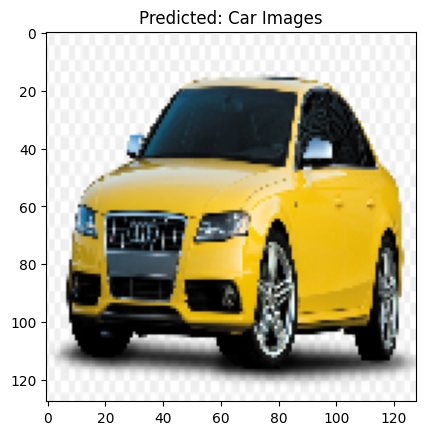

In [ ]:
# Upload image from Pc
uploaded = files.upload()

for img_path in uploaded.keys():
    img = image.load_img(img_path, target_size=(128, 128))
    img_tensor = image.img_to_array(img) / 255.0
    img_tensor = np.expand_dims(img_tensor, axis=0)

    pred = model.predict(img_tensor)
    pred_class = class_labels[np.argmax(pred)]
    print(f"Predicted class: {pred_class}")

    plt.imshow(img)
    plt.title(f"Predicted: {pred_class}")
    plt.show()

## **Conclusion**


The model performed well in classifying Bike, Car, and Plane images, achieving an overall accuracy of 93%. For Bike Images, the model had good recall (97%), meaning it correctly identified most bike images, though precision was slightly lower (88%). For Car Images, precision was high at 96%, but recall was a bit lower at 88%, indicating it missed some cars. Plane Images had the best balance with both precision and recall around 94-96%, showing strong performance overall. In summary, the model classifies all three image types effectively, with minor differences in precision and recall across classes.

## **Web Interface**

In [ ]:
def predict_image(img):
    img = img.resize((128, 128))
    img_tensor = np.array(img) / 255.0
    img_tensor = np.expand_dims(img_tensor, axis=0)

    pred = model.predict(img_tensor)
    pred_class = class_labels[np.argmax(pred)]

    return f"Predicted class: {pred_class}"

interface = gr.Interface(
    fn=predict_image,
    inputs=gr.Image(type="pil"),
    outputs="text",
    title="Image Classification (Bike, Car, Plane)",
    description="Upload an image of a bike, car, or plane and get a prediction."
)

# Launch the interface
interface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://119157197880cd8d74.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


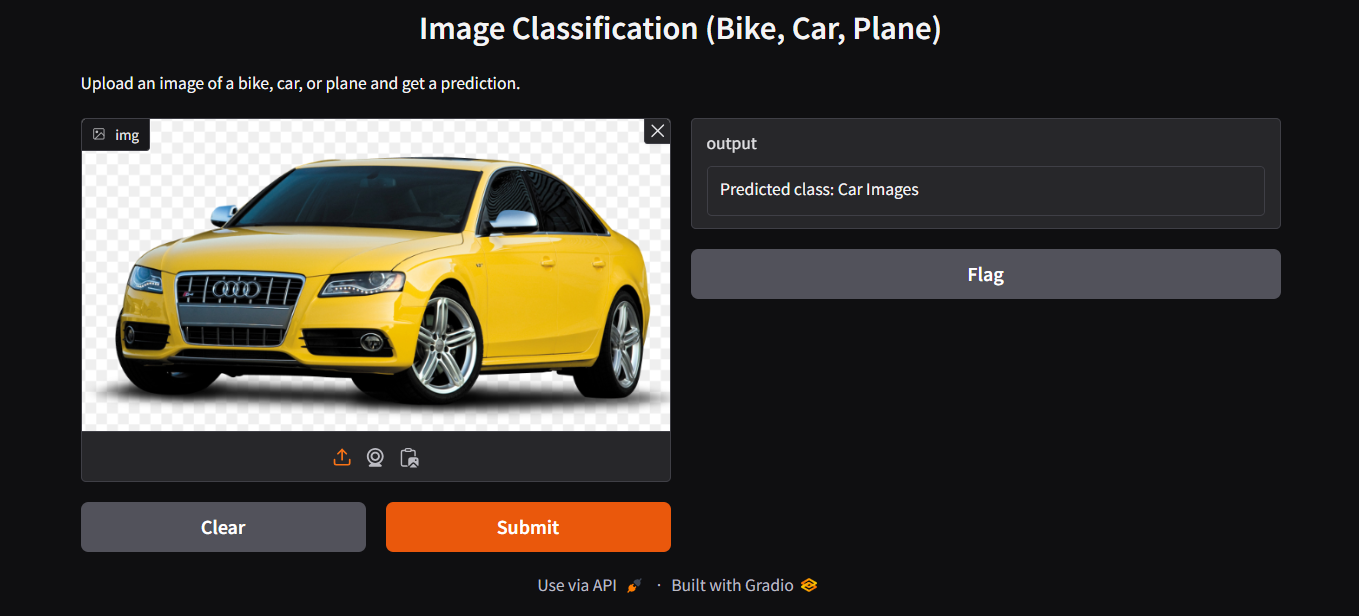